<a href="https://colab.research.google.com/github/dwardo4321/Mathematical-Optimisation/blob/main/Simplex_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%pip install gekko
%pip install matplotlib
%pip install numpy

In [11]:
#solve LP
from gekko import GEKKO
m = GEKKO(remote=False)
x,y = m.Array(m.Var,2,lb=0)
m.Equations([6*x+4*y<=24,x+2*y<=6,-x+y<=1,y<=2])
m.Maximize(x+y)
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 3.0 y: 1.5 obj: 4.5


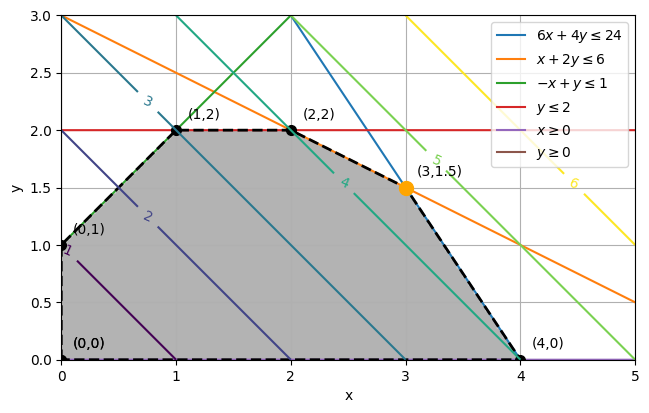

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#visualize solution
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = x+y
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
#plot constraints
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
#objective contours
CS = plt.contour(x,y,obj,np.arange(1,7))
plt.clabel(CS, inline=1, fontsize=10)
#optimal point
plt.plot([xopt],[yopt],marker='o',color='orange',markersize=10)
plt.xlim(0,5); plt.ylim(0,3); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()